## Reto 3: Matriz de Confusión

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una matriz de confusión
    
---
    
### 2. Desarrollo:

En este Reto vamos a utilizar una matriz de confusión para evaluar el modelo que entrenamos en el Reto anterior. Tu Reto consiste en los siguientes pasos:

1. Copia el código del Reto anterior a este Reto, de manera que tengas un modelo entrenado que sea similar.
2. Obtén tu matriz de confusión utilizando `sklearn.metrics.confusion_matrix`.
3. Usando un mapa de calor (heatmap), grafica tu matriz de confusión de manera que sea muy claro y evidente lo que está pasando. Recuerda modificar tus estilos para que sean agradables a la vista.
4. Utilizando la matriz de confusión, obtén las medidas de Precisión, Exactitud, Sensibilidad y Especificidad. Evalúa tu modelo utilizando estas medidas.

> **Reto extra**: Para un reto extra, obtén las medidas del punto 4 sin utilizar los métodos `sklearn.metrics`. Recuerda que todas tus medidas de evaluación las puedes obtener usando aritmética simple y tu matriz de confusión.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../Datasets/diabetes-clean.csv', index_col=0)
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df2 = df[df["skin_thickness"] < 70]
df2 = df2[df2["age"] < 70]
df2 = df2.drop(columns = "pregnancies")
df2 = df2.drop(columns = "age")

In [11]:
x = df.drop(columns= "outcome")
y = df["outcome"]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
y_pred = logreg.predict(X_test)

In [16]:
logreg.score(X_test, y_test)

0.7705627705627706

In [26]:
df.loc[[169]]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
169,3,111,90,12,78,28.4,0.495,29,0


In [25]:
X_test.iloc[[0]]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
169,3,111,90,12,78,28.4,0.495,29


In [28]:
logreg.predict(X_test.iloc[[0]])[0]

0

## Matriz de confusión

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[132  18]
 [ 35  46]]


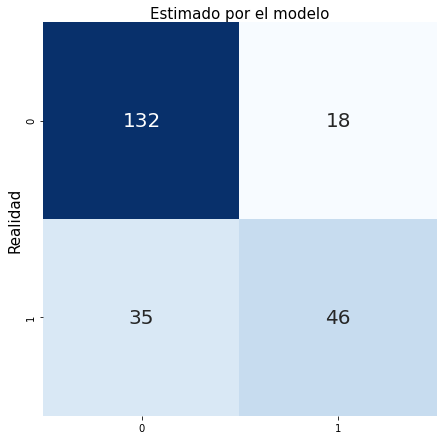

In [39]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [40]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.71875
Exactitud: 0.7705627705627706
Sensibilidad: 0.5679012345679012
Especificidad: 0.88
